# Matching Strategy

In [1]:
import sys
sys.path.append('../')

from data import datasets
from data import transforms
from models.ssd300 import SSD300

In [2]:
transform = transforms.Compose(
    [transforms.Ignore(difficult=True),
     transforms.Normalize(),
     transforms.Centered(),
     transforms.Resize((300, 300)), # if resizing first, can't be normalized
     transforms.OneHot(class_nums=datasets.VOC_class_nums),
     transforms.ToTensor()]
)

dataset = datasets.Compose(datasets.VOC_class_nums, datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset), transform=transform)


model = SSD300(datasets.VOC_class_nums, batch_norm=False)

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2

from models.core.boxes import center2minmax
from models.core.inference import toVisualizeImg, tensor2cvimg

48


<IPython.core.display.Javascript object>


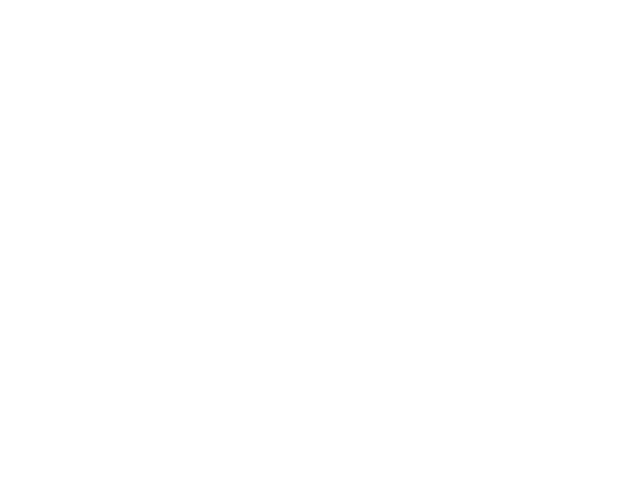

TypeError: 'int' object is not subscriptable

In [7]:
img, targets = dataset[0]
loc, conf = targets[:, :4], targets[:, 4:]
print(conf.argmax().tolist())
plt.figure()
plt.imshow(toVisualizeImg(img, loc, conf_indices=conf.argmax().tolist(), classes=datasets.VOC_classes))

(157, 1) (194, 2) (255, 0, 0)
uint8 (300, 300, 3)


<IPython.core.display.Javascript object>


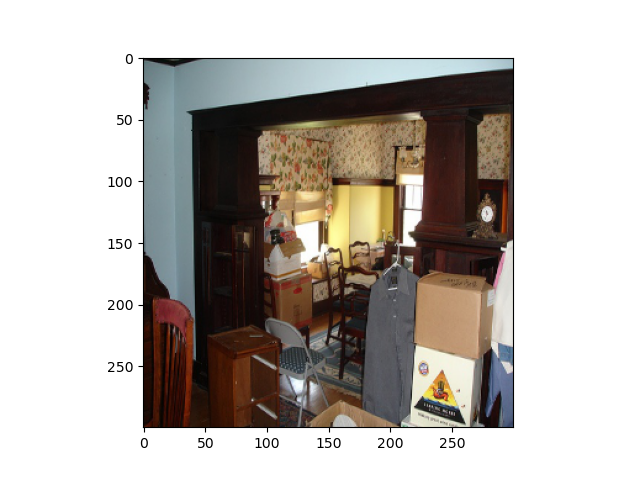

<class 'int'>


array([[[ 11,  10,  10],
        [ 10,  10,  10],
        [  9,  13,  10],
        ...,
        [166, 186, 195],
        [164, 187, 193],
        [162, 186, 192]],

       [[ 18,  19,  21],
        [ 12,  13,  14],
        [ 10,   9,  10],
        ...,
        [162, 189, 195],
        [162, 189, 196],
        [162, 189, 196]],

       [[ 84,  91,  94],
        [ 69,  75,  77],
        [ 56,  58,  62],
        ...,
        [164, 190, 197],
        [165, 190, 197],
        [164, 188, 195]],

       ...,

       [[ 21,  10,   6],
        [ 19,   9,   5],
        [ 27,  10,   1],
        ...,
        [ 61,  73, 104],
        [ 58,  70, 102],
        [ 55,  67,  99]],

       [[ 35,   9,   5],
        [ 32,  10,   2],
        [ 51,  18,   4],
        ...,
        [ 57,  72, 102],
        [ 62,  77, 107],
        [ 65,  79, 109]],

       [[ 51,  17,   6],
        [ 68,  23,  13],
        [ 86,  28,   9],
        ...,
        [ 57,  74, 104],
        [ 64,  79, 108],
        [ 69,  84, 113]]

In [62]:
angles = np.linspace(0, 255, 20).astype(np.uint8)
#print(angles.shape)
hsvs = np.array((0, 255, 255))[np.newaxis, np.newaxis, :].astype(np.uint8)
hsvs = np.repeat(hsvs, 20, axis=0)
#print(hsvs.shape)
hsvs[:, 0, 0] += angles

rgbs = cv2.cvtColor(hsvs, cv2.COLOR_HSV2RGB).astype(np.int)
locs_mm = center2minmax(loc).numpy()

h, w, c = img.shape
locs_mm[:, ::2] *= w
locs_mm[:, 1::2] *= h
locs_mm = np.clip(locs_mm, 0, w).astype(np.int)

topleft = locs_mm[0, :2]
bottomright = locs_mm[0, 2:]
print(tuple(topleft), tuple(bottomright), tuple(rgbs[0, 0]))
print(tensor2cvimg(img).dtype, tensor2cvimg(img).shape)
plt.figure()
plt.imshow(tensor2cvimg(img))
a = tuple(rgbs[0, 0].tolist())
print(type(a[0]))
cv2.rectangle(tensor2cvimg(img), tuple(topleft), tuple(bottomright), a, 2)